In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.optimize import curve_fit

In [2]:
file_fac = open("data/scan_fac_14_11_22")
file_res = open("data/scan_single_atom_14_11_22")

data_res = []
data_fac = []

for row in file_res:
    row = row.split("\t")
    dat = list(map(float, row))
    data_res.append(dat)

for row in file_fac:
    row = row.split("\t")
    dat = list(map(float, row))
    data_fac.append(dat)

data_fac = np.asarray(data_fac)
data_res = np.asarray(data_res)

/var/folders/gq/pyfb45qx3wg52k7kygqcjy840000gn/T/ipykernel_16400/737534341.py:8: RuntimeWarning: overflow encountered in exp
  y = A*np.exp(-1*B*(x-C)**2)


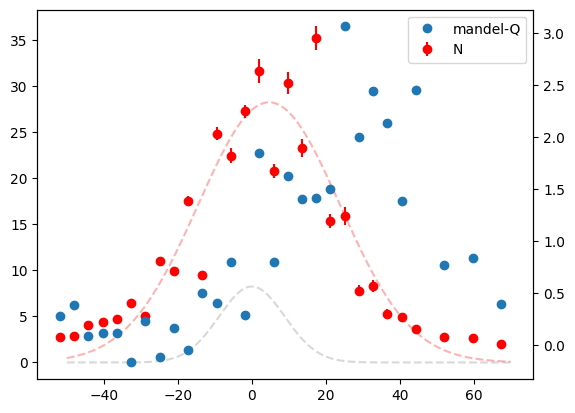

In [9]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

xdata = data_fac[:,-1]
ydata = data_fac[:,1]

def Gauss(x, A, B, C):
    y = A*np.exp(-1*B*(x-C)**2)
    return y
parameters, covariance = curve_fit(Gauss, xdata, ydata)
  
fit_A = parameters[0]
fit_B = parameters[1]
fit_C = parameters[2]
  
ax1.errorbar(data_fac[:,-1], data_fac[:,1], data_fac[:,4]*5, marker="o", ls="", c="r", label="N")
ax2.plot(data_fac[:,-1], data_fac[:,3], marker="o", ls="", label="Q")

#fit_y = Gauss(xdata, fit_A, fit_B)
#plt.plot(xdata, ydata, 'o', label='data')
#plt.plot(xdata, fit_y, '-', label='fit')
#plt.legend()

x_data = np.arange(-50, 70, 0.001)
y_data = Gauss(x_data, fit_A, fit_B, fit_C)

ax1.plot(x_data, y_data, c="r", ls="--", alpha = 0.3)

x_data = np.arange(-50, 70, 0.001)
y_data = Gauss(x_data, fit_A-20, fit_B+0.005, 0)

ax1.plot(x_data, y_data, c="gray", ls="--", alpha = 0.3)
ax1.plot([],[],  marker="o", ls="", label="mandel-Q")

ax1.legend()
plt.show()

In [4]:
parameters

array([2.82465243e+01, 1.36211892e-03, 4.64300183e+00])